Importing packages.

In [2]:
import pandas as pd 
import dask.dataframe as dd
import os
from tqdm import tqdm
import numpy as np
import time
from datetime import date
from datetime import datetime

import datetime as dt

Declaring the path of a file.

In [2]:
TRAIN_PATH = r'C:\Users\xkats\Desktop\BigDataContent\mer.txt'

Just read a few rows to see the contents.

In [3]:
df_tmp = pd.read_csv(TRAIN_PATH, nrows=5,sep=" ")
df_tmp.head()

,Clicks,Session,Buys
0,4,1,NaN
1,6,2,NaN
2,3,3,NaN
3,2,4,NaN
4,2,6,NaN


Convert the types for memory purposes

In [4]:
traintypes = {'Session': 'float32',
              'Clicks': 'float32', 
              'Buys': 'float32',
               }

cols = list(traintypes.keys())

In [5]:
len(df_tmp.columns),df_tmp.columns

(3, Index(['Clicks', 'Session', 'Buys'], dtype='object'))

Declare a size o batch and run the reading into a list for faster results.

In [6]:
chunksize = 10_000_000


df_list = [] # list to hold the batch dataframe

for df_chunk in tqdm(pd.read_csv(TRAIN_PATH, usecols=cols, dtype=traintypes, chunksize=chunksize,sep=" ")):
        df_list.append(df_chunk) 


1it [00:09,  9.97s/it]


In [ ]:
df_list

Dataframe with the information of the merged dataset from bash. 

In [7]:
one=pd.concat(df_list)

one.head(20)

,Clicks,Session,Buys
0,4.0,1.0,NaN
1,6.0,2.0,NaN
2,3.0,3.0,NaN
3,2.0,4.0,NaN
4,2.0,6.0,NaN
5,2.0,7.0,NaN
6,2.0,8.0,NaN
7,3.0,9.0,NaN
8,12.0,11.0,12.0
9,2.0,12.0,NaN


To fix the total spend time 

In [11]:
traintypes_2 = {'Session': 'int',
              'Date': 'object', 
               }

cols = list(traintypes_2.keys())

chunk=33_003_945

time = []

for df_chunk in tqdm(pd.read_csv(r'C:\Users\xkats\Desktop\BigDataContent\tim.txt', usecols=cols, dtype=traintypes_2, chunksize=chunk,sep=" ")):
        time.append(df_chunk) 


df=pd.concat(time)

1it [00:51, 51.93s/it]


In [12]:
df.dtypes

df.sort_values(['Session']) # Sort the dataframe according to session id.

,Session,Date
0,1,2014-04-07T10:51:09
1,1,2014-04-07T10:54:09
2,1,2014-04-07T10:54:46
3,1,2014-04-07T10:57:00
4,2,2014-04-07T13:56:37
5,2,2014-04-07T13:57:19
6,2,2014-04-07T13:58:37
7,2,2014-04-07T13:59:50
8,2,2014-04-07T14:00:38
9,2,2014-04-07T14:02:36


In [13]:
df.head(20)

,Session,Date
0,1,2014-04-07T10:51:09
1,1,2014-04-07T10:54:09
2,1,2014-04-07T10:54:46
3,1,2014-04-07T10:57:00
4,2,2014-04-07T13:56:37
5,2,2014-04-07T13:57:19
6,2,2014-04-07T13:58:37
7,2,2014-04-07T13:59:50
8,2,2014-04-07T14:00:38
9,2,2014-04-07T14:02:36


Keep the first and last of the timestamp

In [14]:
g = df.groupby('Session')

end=(pd.concat([g.head(1), g.tail(1)],axis=1)
   .drop_duplicates()
   .reset_index(drop=True))

In [15]:
end.head(20)

,Session,Date,Session,Date
0,1.0,2014-04-07T10:51:09,NaN,NaN
1,NaN,NaN,1.0,2014-04-07T10:57:00
2,2.0,2014-04-07T13:56:37,NaN,NaN
3,NaN,NaN,2.0,2014-04-07T14:02:36
4,3.0,2014-04-02T13:17:46,NaN,NaN
5,NaN,NaN,3.0,2014-04-02T13:30:12
6,4.0,2014-04-07T12:09:10,NaN,NaN
7,NaN,NaN,4.0,2014-04-07T12:26:25
8,6.0,2014-04-06T16:58:20,NaN,NaN
9,NaN,NaN,6.0,2014-04-06T17:02:26


As we can see the dataset needs to be treated in order to be fixed and not having null values.

Rename in order to split

In [16]:
end.columns = ['Session', 'First','No',"Last"]

The first in order to delete Nan

In [17]:
e=end[['Session',"First"]]

In [18]:
e=e.dropna(how='any')

The second in order to delete Nan

In [19]:
l=end[['No','Last']]

In [20]:
l=l.dropna(how='any')

In [21]:
l.columns=['Session','Last']

In [22]:
dif=pd.merge(e, l, on=['Session'])


In [23]:
dif.head(20)

,Session,First,Last
0,1.0,2014-04-07T10:51:09,2014-04-07T10:57:00
1,2.0,2014-04-07T13:56:37,2014-04-07T14:02:36
2,3.0,2014-04-02T13:17:46,2014-04-02T13:30:12
3,4.0,2014-04-07T12:09:10,2014-04-07T12:26:25
4,6.0,2014-04-06T16:58:20,2014-04-06T17:02:26
5,7.0,2014-04-02T06:38:53,2014-04-02T06:39:05
6,8.0,2014-04-06T08:49:58,2014-04-06T08:52:12
7,9.0,2014-04-06T11:26:24,2014-04-06T11:29:13
8,11.0,2014-04-03T10:44:35,2014-04-03T10:57:39
9,12.0,2014-04-02T10:30:13,2014-04-02T10:33:12


To remove the T

In [25]:
dif.First = [x.replace('T', ' ') for x in dif.First]

dif.Last = [x.replace('T', ' ') for x in dif.Last]

#dif

In [26]:
dif.First=pd.to_datetime(dif.First)
dif.Last=pd.to_datetime(dif.Last)


dif.dtypes

Session           float64
First      datetime64[ns]
Last       datetime64[ns]
dtype: object

Calculate the time diffrence.

In [27]:
dif['Difference'] = (dif['First'].values-dif['Last']).abs()


dif.head(20)

,Session,First,Last,Difference
0,1.0,2014-04-07 10:51:09,2014-04-07 10:57:00,00:05:51
1,2.0,2014-04-07 13:56:37,2014-04-07 14:02:36,00:05:59
2,3.0,2014-04-02 13:17:46,2014-04-02 13:30:12,00:12:26
3,4.0,2014-04-07 12:09:10,2014-04-07 12:26:25,00:17:15
4,6.0,2014-04-06 16:58:20,2014-04-06 17:02:26,00:04:06
5,7.0,2014-04-02 06:38:53,2014-04-02 06:39:05,00:00:12
6,8.0,2014-04-06 08:49:58,2014-04-06 08:52:12,00:02:14
7,9.0,2014-04-06 11:26:24,2014-04-06 11:29:13,00:02:49
8,11.0,2014-04-03 10:44:35,2014-04-03 10:57:39,00:13:04
9,12.0,2014-04-02 10:30:13,2014-04-02 10:33:12,00:02:59


In [28]:
total=pd.merge(one, dif, on=['Session'])


total.head(20)

,Clicks,Session,Buys,First,Last,Difference
0,4.0,1.0,NaN,2014-04-07 10:51:09,2014-04-07 10:57:00,00:05:51
1,6.0,2.0,NaN,2014-04-07 13:56:37,2014-04-07 14:02:36,00:05:59
2,3.0,3.0,NaN,2014-04-02 13:17:46,2014-04-02 13:30:12,00:12:26
3,2.0,4.0,NaN,2014-04-07 12:09:10,2014-04-07 12:26:25,00:17:15
4,2.0,6.0,NaN,2014-04-06 16:58:20,2014-04-06 17:02:26,00:04:06
5,2.0,7.0,NaN,2014-04-02 06:38:53,2014-04-02 06:39:05,00:00:12
6,2.0,8.0,NaN,2014-04-06 08:49:58,2014-04-06 08:52:12,00:02:14
7,3.0,9.0,NaN,2014-04-06 11:26:24,2014-04-06 11:29:13,00:02:49
8,12.0,11.0,12.0,2014-04-03 10:44:35,2014-04-03 10:57:39,00:13:04
9,2.0,12.0,NaN,2014-04-02 10:30:13,2014-04-02 10:33:12,00:02:59


Keep only the columns that we actually need.

In [29]:
final=total[['Session','Clicks','Difference','Buys']]

final

,Session,Clicks,Difference,Buys
0,1.0,4.0,00:05:51,NaN
1,2.0,6.0,00:05:59,NaN
2,3.0,3.0,00:12:26,NaN
3,4.0,2.0,00:17:15,NaN
4,6.0,2.0,00:04:06,NaN
5,7.0,2.0,00:00:12,NaN
6,8.0,2.0,00:02:14,NaN
7,9.0,3.0,00:02:49,NaN
8,11.0,12.0,00:13:04,12.0
9,12.0,2.0,00:02:59,NaN


Correcting the Mistake!! that we found later on.


We load all the datasets we need.

In [30]:
f_t=pd.read_csv(r'C:\Users\xkats\Desktop\BigDataContent\final.csv')

In [31]:
c_l=pd.read_csv(r'C:\Users\xkats\Desktop\BigDataContent\e_c_sorty.txt',sep=",")# The sorted dataset 
                                                                               # with the clicks' information
b_s=pd.read_csv(r'C:\Users\xkats\Desktop\BigDataContent\e_sorty.txt',sep=",",header=None)#The sorted dataset 
                                                                                         #with the buys information
#Keep only the columns we need
b2=b_s.iloc[:,1:3] 

c2=c_l.iloc[:,1:3]

#Rename Columns
c2.columns=['Clicks','Session']
b2.columns=['Buys','Session']
#Sort the data.
b2.sort_values('Session')
c2.sort_values('Session')


,Clicks,Session
0,4,1
1,6,2
2,3,3
3,2,4
4,2,6
5,2,7
6,2,8
7,3,9
8,12,11
9,2,12


We load the previous (wrong) dataset in order to save time doing everything from the beginning.

In [32]:
f2=f_t.iloc[:,1:4]

f2.head(20)

,Session,Clicks,Difference
0,1.0,4.0,0 days 00:05:51.000000000
1,2.0,6.0,0 days 00:05:59.000000000
2,3.0,3.0,0 days 00:12:26.000000000
3,4.0,2.0,0 days 00:17:15.000000000
4,6.0,2.0,0 days 00:04:06.000000000
5,7.0,2.0,0 days 00:00:12.000000000
6,8.0,2.0,0 days 00:02:14.000000000
7,9.0,3.0,0 days 00:02:49.000000000
8,11.0,12.0,0 days 00:13:04.000000000
9,12.0,2.0,0 days 00:02:59.000000000


In [35]:
total=pd.merge(f2, b2, on=['Session'],how='outer')


total.head(20)

,Session,Clicks,Difference,Buys
0,1.0,4.0,0 days 00:05:51.000000000,NaN
1,2.0,6.0,0 days 00:05:59.000000000,NaN
2,3.0,3.0,0 days 00:12:26.000000000,NaN
3,4.0,2.0,0 days 00:17:15.000000000,NaN
4,6.0,2.0,0 days 00:04:06.000000000,NaN
5,7.0,2.0,0 days 00:00:12.000000000,NaN
6,8.0,2.0,0 days 00:02:14.000000000,NaN
7,9.0,3.0,0 days 00:02:49.000000000,NaN
8,11.0,12.0,0 days 00:13:04.000000000,2.0
9,12.0,2.0,0 days 00:02:59.000000000,1.0


To find the total price

In [36]:
path=r'C:\Users\xkats\Desktop\BigDataContent\buys.txt'

In [37]:
traintypes_3 = {'Session': 'int',
                'Date': 'object',
                'Product_id':'int',
                'Price':'int',
                'Quantity':'int'                
               }

colm = list(traintypes_3.keys())

In [38]:
chunky=1_150_753

In [39]:

price = [] # list to hold the batch dataframe

for df_chunk in tqdm(pd.read_csv(path, usecols=colm, dtype=traintypes_3, chunksize=chunky,sep=",")):
        price.append(df_chunk) 

1it [00:04,  4.98s/it]


In [40]:
for_price=pd.concat(price)

for_price.sort_values('Price')

,Session,Date,Product_id,Price,Quantity
575376,6112882,2014-07-13T09:13:45.402Z,214846301,0,0
520174,5304581,2014-06-30T16:21:10.084Z,214515870,0,0
520175,5459329,2014-06-28T16:06:09.141Z,214847936,0,0
520176,5459329,2014-06-28T16:06:30.236Z,214847936,0,0
520177,5459329,2014-06-28T16:10:39.077Z,214847936,0,0
520178,5553424,2014-06-27T14:29:55.920Z,214843367,0,0
520179,5459328,2014-06-29T11:12:18.615Z,214845583,0,0
520180,5459328,2014-06-29T11:12:18.663Z,214844372,0,0
520181,5459328,2014-06-29T11:12:18.664Z,214844398,0,0
520182,5335959,2014-06-29T14:48:15.726Z,214552843,0,0


In [41]:
for_price.loc[(for_price['Quantity'] == 0)&(for_price['Price'] == 0)]


,Session,Date,Product_id,Price,Quantity
289,281963,2014-04-07T20:33:54.828Z,214563144,0,0
336,210097,2014-04-07T17:45:33.522Z,214508942,0,0
502,351577,2014-04-07T17:45:02.666Z,214827022,0,0
503,351577,2014-04-07T17:45:02.740Z,214829741,0,0
568,419982,2014-04-07T15:02:06.999Z,214748300,0,0
731,210612,2014-04-07T14:42:23.943Z,214716977,0,0
732,210612,2014-04-07T14:42:24.032Z,214716941,0,0
759,420287,2014-04-07T18:12:30.007Z,214821277,0,0
1013,139959,2014-04-07T17:41:38.837Z,214601040,0,0
1014,139959,2014-04-07T17:41:38.909Z,214601042,0,0


In [42]:
for_price.loc[for_price['Price'] == 0]


,Session,Date,Product_id,Price,Quantity
289,281963,2014-04-07T20:33:54.828Z,214563144,0,0
336,210097,2014-04-07T17:45:33.522Z,214508942,0,0
502,351577,2014-04-07T17:45:02.666Z,214827022,0,0
503,351577,2014-04-07T17:45:02.740Z,214829741,0,0
568,419982,2014-04-07T15:02:06.999Z,214748300,0,0
731,210612,2014-04-07T14:42:23.943Z,214716977,0,0
732,210612,2014-04-07T14:42:24.032Z,214716941,0,0
759,420287,2014-04-07T18:12:30.007Z,214821277,0,0
1013,139959,2014-04-07T17:41:38.837Z,214601040,0,0
1014,139959,2014-04-07T17:41:38.909Z,214601042,0,0


Load the clicks dataset

In [1]:
traintypes_4 = {'Session': 'int',
                'Date': 'object',
                'Product_id':'int',
                'Category':'object',               
               }

colms = list(traintypes_4.keys())

In [3]:
chunks=33_003_945

In [4]:
clicks = [] # list to hold the batch dataframe

for df_chunk in tqdm(pd.read_csv(r'C:\Users\xkats\Desktop\BigDataContent\clicks.txt', usecols=colms, dtype=traintypes_4, chunksize=chunks,sep=",")):
        clicks.append(df_chunk) 

1it [01:19, 79.73s/it]


In [5]:
click=pd.concat(clicks)

In [6]:
click.head(20)

,Session,Date,Product_id,Category
0,1,2014-04-07T10:51:09.277Z,214536502,0
1,1,2014-04-07T10:54:09.868Z,214536500,0
2,1,2014-04-07T10:54:46.998Z,214536506,0
3,1,2014-04-07T10:57:00.306Z,214577561,0
4,2,2014-04-07T13:56:37.614Z,214662742,0
5,2,2014-04-07T13:57:19.373Z,214662742,0
6,2,2014-04-07T13:58:37.446Z,214825110,0
7,2,2014-04-07T13:59:50.710Z,214757390,0
8,2,2014-04-07T14:00:38.247Z,214757407,0
9,2,2014-04-07T14:02:36.889Z,214551617,0


Here we wanted to see whether we could potentially use the Category column.
As we can see there are too many missing values so we will not use it.

In [7]:
click.loc[click['Category'] =='0']


,Session,Date,Product_id,Category
0,1,2014-04-07T10:51:09.277Z,214536502,0
1,1,2014-04-07T10:54:09.868Z,214536500,0
2,1,2014-04-07T10:54:46.998Z,214536506,0
3,1,2014-04-07T10:57:00.306Z,214577561,0
4,2,2014-04-07T13:56:37.614Z,214662742,0
5,2,2014-04-07T13:57:19.373Z,214662742,0
6,2,2014-04-07T13:58:37.446Z,214825110,0
7,2,2014-04-07T13:59:50.710Z,214757390,0
8,2,2014-04-07T14:00:38.247Z,214757407,0
9,2,2014-04-07T14:02:36.889Z,214551617,0


In [8]:
click.date=pd.to_datetime(click.Date)

C:\Users\xkats\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [9]:
click.head(20)


,Session,Date,Product_id,Category
0,1,2014-04-07T10:51:09.277Z,214536502,0
1,1,2014-04-07T10:54:09.868Z,214536500,0
2,1,2014-04-07T10:54:46.998Z,214536506,0
3,1,2014-04-07T10:57:00.306Z,214577561,0
4,2,2014-04-07T13:56:37.614Z,214662742,0
5,2,2014-04-07T13:57:19.373Z,214662742,0
6,2,2014-04-07T13:58:37.446Z,214825110,0
7,2,2014-04-07T13:59:50.710Z,214757390,0
8,2,2014-04-07T14:00:38.247Z,214757407,0
9,2,2014-04-07T14:02:36.889Z,214551617,0


In [10]:
click=click.sort_values(['Session', 'Date'])

In [11]:
click.head(20)

,Session,Date,Product_id,Category
0,1,2014-04-07T10:51:09.277Z,214536502,0
1,1,2014-04-07T10:54:09.868Z,214536500,0
2,1,2014-04-07T10:54:46.998Z,214536506,0
3,1,2014-04-07T10:57:00.306Z,214577561,0
4,2,2014-04-07T13:56:37.614Z,214662742,0
5,2,2014-04-07T13:57:19.373Z,214662742,0
6,2,2014-04-07T13:58:37.446Z,214825110,0
7,2,2014-04-07T13:59:50.710Z,214757390,0
8,2,2014-04-07T14:00:38.247Z,214757407,0
9,2,2014-04-07T14:02:36.889Z,214551617,0


In [12]:
click['Sequence']=click.groupby(['Session']).cumcount() #Group By to find sequence of clicks

In [14]:
click.head(10)

,Session,Date,Product_id,Category,Sequence
0,1,2014-04-07T10:51:09.277Z,214536502,0,0
1,1,2014-04-07T10:54:09.868Z,214536500,0,1
2,1,2014-04-07T10:54:46.998Z,214536506,0,2
3,1,2014-04-07T10:57:00.306Z,214577561,0,3
4,2,2014-04-07T13:56:37.614Z,214662742,0,0
5,2,2014-04-07T13:57:19.373Z,214662742,0,1
6,2,2014-04-07T13:58:37.446Z,214825110,0,2
7,2,2014-04-07T13:59:50.710Z,214757390,0,3
8,2,2014-04-07T14:00:38.247Z,214757407,0,4
9,2,2014-04-07T14:02:36.889Z,214551617,0,5


In [15]:
click.describe()

,Session,Product_id,Sequence
count,3.300394e+07,3.300394e+07,3.300394e+07
mean,5.620195e+06,2.168345e+08,3.294267e+00
std,3.356590e+06,2.981944e+07,6.547274e+00
min,1.000000e+00,2.145072e+08,0.000000e+00
25%,2.691097e+06,2.146761e+08,0.000000e+00
50%,5.516873e+06,2.148268e+08,1.000000e+00
75%,8.527383e+06,2.148454e+08,4.000000e+00
max,1.156216e+07,1.178838e+09,1.990000e+02


We also kept some intermidiate datasets for time saving purposes.

In [16]:
products=pd.DataFrame(click.Product_id.unique())

In [17]:
products.columns=['Product_id'] 

In [20]:
pr = pd.read_csv(r'C:\Users\xkats\Desktop\BigDataContent\price.csv')
cl=pd.read_csv(r'C:\Users\xkats\Desktop\BigDataContent\clusters.csv')

In [21]:
cl=cl[['Product_id','Session','Sequence']]

In [22]:
cl.to_csv(r'C:\Users\xkats\Desktop\BigDataContent\cl.csv')


In [23]:
pr=pr[['Session','Product_id','Date','Price','Quantity']] # Keep only the columns we need

In [24]:
pr=pr.sort_values('Session')#Sort the data according to Session

We found out that we will not use the full product list due to lack of information in prices and quantities.

In [25]:
products=pd.DataFrame(pr.Product_id.value_counts())


For products' clustering.

In [26]:
for_clusters=pr[['Session','Product_id','Price','Quantity']] # Keep nescessary columns

for_clusters=for_clusters[(for_clusters.Quantity!=0) | (for_clusters.Price!=0)] # Drop values with missing information

different_session_buys=pd.DataFrame(for_clusters.groupby('Product_id')['Session'].nunique())# Count in how many Sessions the product was bought

different_session_buys.head(20)

,Session
Product_id,
214507331,115
214507365,29
214507385,26
214507387,28
214507408,19
214507415,17
214507445,19
214507447,40
214507492,43


To check the results.

In [27]:
different_session_buys[different_session_buys.index==214507331]

,Session
Product_id,
214507331,115


In [29]:
different_session_buys.reset_index(level=0, inplace=True) #Fix Index


different_session_buys.head(20)

,index,Product_id,Session
0,0,214507331,115
1,1,214507365,29
2,2,214507385,26
3,3,214507387,28
4,4,214507408,19
5,5,214507415,17
6,6,214507445,19
7,7,214507447,40
8,8,214507492,43
9,9,214507556,18


In [30]:
tot_quant=pd.DataFrame(for_clusters.groupby('Product_id')['Quantity'].sum())

tot_quant.head(20)

,Quantity
Product_id,
214507331,132
214507365,95
214507385,277
214507387,370
214507408,98
214507415,100
214507445,224
214507447,240
214507492,138


For the price.

In [31]:
price_cl=for_clusters[['Product_id','Price']]

Merge with inner join the two datsets.

In [32]:
products_cl=pd.merge(different_session_buys,tot_quant,on='Product_id',how='inner')

In [33]:
price_cl=price_cl.drop_duplicates() # Drop Duplicate values

In [34]:
price_cl.head(20)

,Product_id,Price
2676,214821371,1046
3931,214717867,1778
8185,214838503,18745
8400,214548744,3141
20173,214820225,2092
19661,214834865,523
20188,214706441,1360
26041,214716932,4188
26040,214716932,7328
49666,214820392,627


In [35]:
products_clust=pd.merge(price_cl,products_cl,on='Product_id',how='inner') # Inner join to keep the values

In [40]:
products_clust=products_clust[['Product_id','Price','Session','Quantity']] #Remove the column index

In [41]:
products_clust.head(20)

,Product_id,Price,Session,Quantity
0,214821371,1046,134,179
1,214717867,1778,193,487
2,214717867,1779,193,487
3,214717867,1570,193,487
4,214717867,1674,193,487
5,214838503,18745,172,198
6,214548744,3141,51,55
7,214820225,2092,9,11
8,214834865,523,279,428
9,214706441,1360,81,106


Clustering of Products.

In [42]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline
from sklearn import datasets


In [43]:
prod_final=products_clust.drop(['Product_id'],axis=1) # Drop the id 

In [44]:
prod_final.head(20)

,Price,Session,Quantity
0,1046,134,179
1,1778,193,487
2,1779,193,487
3,1570,193,487
4,1674,193,487
5,18745,172,198
6,3141,51,55
7,2092,9,11
8,523,279,428
9,1360,81,106


In [45]:
#standardize the data to normal distribution
from sklearn import preprocessing
dat_stand = preprocessing.scale(prod_final)
dat_stand = pd.DataFrame(dat_stand)

C:\Users\xkats\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


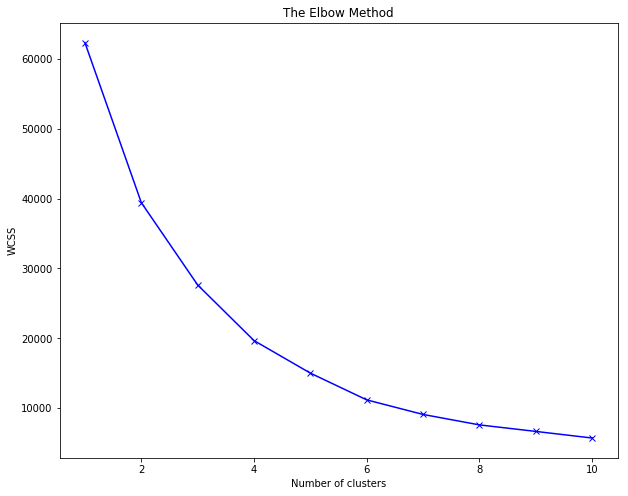

In [46]:
# find the appropriate cluster number
plt.figure(figsize=(10, 8))
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dat_stand)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss,'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(dat_stand)
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1
# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)
# Adding cluster to the Dataset1
prod_final['cluster'] = cluster
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(prod_final.groupby('cluster').mean(),1))
kmeans_mean_cluster

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(prod_final['Price/Unit'])
y = np.array(prod_final['N_Diff_Sessions'])
z = np.array(prod_final['Quantity'])

ax.scatter(x,y,z, marker="s", c=prod_final["cluster"], s=40, cmap="RdBu")

plt.show()


In [47]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(dat_stand)
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1
# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)
# Adding cluster to the Dataset1
prod_final['cluster'] = cluster
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(prod_final.groupby('cluster').mean(),1))
kmeans_mean_cluster

,Price,Session,Quantity
cluster,,,
1,4739.5,19.3,29.7
2,3589.3,460.5,730.8
3,62416.3,11.0,12.7
4,1665.1,1694.7,2806.6


Find the cluster members.

In [51]:
len(cluster[cluster.iloc[:,0]==1])


(19027,)

In [52]:
len(cluster[cluster.iloc[:,0]==2])

878

In [53]:
len(cluster[cluster.iloc[:,0]==3])

786

In [50]:
len(cluster[cluster.iloc[:,0]==4])

99

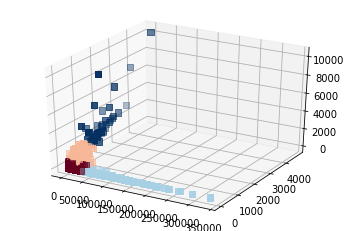

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(prod_final['Price'])
y = np.array(prod_final['Session'])
z = np.array(prod_final['Quantity'])

ax.scatter(x,y,z, marker="s", c=prod_final["cluster"], s=40, cmap="RdBu")

plt.show()


In [ ]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(dat_stand)
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1
# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)
# Adding cluster to the Dataset1
prod_final['cluster'] = cluster
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(prod_final.groupby('cluster').mean(),1))
kmeans_mean_cluster

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(prod_final['Price/Unit'])
y = np.array(prod_final['N_Diff_Sessions'])
z = np.array(prod_final['Quantity'])

ax.scatter(x,y,z, marker="s", c=prod_final["cluster"], s=40, cmap="Spectral")

plt.show()

In [ ]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(dat_stand)
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1
# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)
# Adding cluster to the Dataset1
prod_final['cluster'] = cluster
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(prod_final.groupby('cluster').mean(),1))
kmeans_mean_cluster

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(prod_final['Price/Unit'])
y = np.array(prod_final['N_Diff_Sessions'])
z = np.array(prod_final['Quantity'])

ax.scatter(x,y,z, marker="s", c=prod_final["cluster"], s=40, cmap="Spectral")

plt.show()

We concluded that the optimal solution is to cleate nto four clusters

For Session/Buyers clustering.

In [56]:
len(pr)

1150753

In [57]:
pr.head(20)

,Session,Product_id,Date,Price,Quantity
2676,11,214821371,2014-04-03T11:04:18.097Z,1046,1
2675,11,214821371,2014-04-03T11:04:11.417Z,1046,1
3931,12,214717867,2014-04-02T10:42:17.227Z,1778,4
8185,21,214838503,2014-04-07T09:24:18.360Z,18745,1
8400,21,214548744,2014-04-07T09:24:18.307Z,3141,1
20173,33,214820225,2014-04-06T18:24:51.207Z,2092,1
19661,33,214834865,2014-04-06T18:24:51.295Z,523,2
20188,33,214706441,2014-04-06T18:24:51.426Z,1360,1
20187,33,214706441,2014-04-06T18:24:51.207Z,1360,1
20174,33,214820225,2014-04-06T18:24:51.422Z,2092,1


In [58]:
for_tot=pr[['Session','Product_id','Price','Quantity']] # keep the columns we need

for_tot['Total_Price']=for_tot.Price*for_tot.Quantity # Calculate the total spend for each quantity

for_total=pd.DataFrame(for_tot.groupby('Session')['Total_Price'].sum()) #Calculate the total price


In [59]:
for_total.reset_index(level=0, inplace=True) #Reset index

In [60]:
f=pd.read_csv(r'C:\Users\xkats\Desktop\BigDataContent\final.csv') #Read the dataset with the total clicks and buys


In [61]:
f.head(20)

,Unnamed: 0,Session,Clicks,Difference,Buys
0,0,1.0,4.0,0 days 00:05:51.000000000,NaN
1,1,2.0,6.0,0 days 00:05:59.000000000,NaN
2,2,3.0,3.0,0 days 00:12:26.000000000,NaN
3,3,4.0,2.0,0 days 00:17:15.000000000,NaN
4,4,6.0,2.0,0 days 00:04:06.000000000,NaN
5,5,7.0,2.0,0 days 00:00:12.000000000,NaN
6,6,8.0,2.0,0 days 00:02:14.000000000,NaN
7,7,9.0,3.0,0 days 00:02:49.000000000,NaN
8,8,11.0,12.0,0 days 00:13:04.000000000,2.0
9,9,12.0,2.0,0 days 00:02:59.000000000,1.0


In [62]:
click_t=f[['Session','Clicks','Buys']] #Keep the desired columns

In [63]:
for_ses=pd.merge(click_t,for_total,on='Session',how='outer') #Join on sessions

In [64]:
for_ses_c=for_ses[['Clicks','Buys','Total_Price']] #Keep the columns

In [65]:
for_cl = for_ses_c.fillna(0) #Fill the NA's as the model cannot handle null values


In [66]:
for_cl.head(20)

,Clicks,Buys,Total_Price
0,4.0,0.0,0.0
1,6.0,0.0,0.0
2,3.0,0.0,0.0
3,2.0,0.0,0.0
4,2.0,0.0,0.0
5,2.0,0.0,0.0
6,2.0,0.0,0.0
7,3.0,0.0,0.0
8,12.0,2.0,2092.0
9,2.0,1.0,7112.0


In [67]:
#standardize the data to normal distribution
from sklearn import preprocessing
dat_stand = preprocessing.scale(for_cl)
dat_stand = pd.DataFrame(dat_stand)

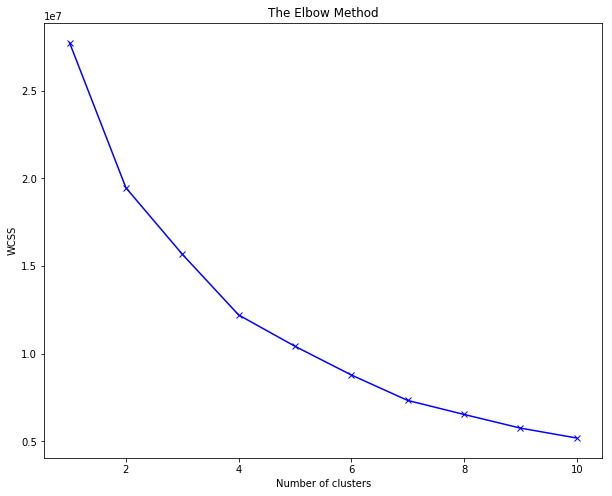

In [68]:
# find the appropriate cluster number
plt.figure(figsize=(10, 8))
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dat_stand)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss,'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Try 4 clusters.

In [69]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(dat_stand)
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1
# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)
# Adding cluster to the Dataset1
for_cl['cluster'] = cluster
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(for_cl.groupby('cluster').mean(),1))
kmeans_mean_cluster

,Clicks,Buys,Total_Price
cluster,,,
1,2.7,0.0,42.6
2,9.6,3.7,4688.1
3,6.8,2.5,43263.6
4,12.5,0.1,65.6


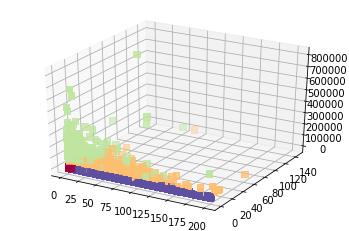

In [70]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(for_cl['Clicks'])
y = np.array(for_cl['Buys'])
z = np.array(for_cl['Total_Price'])

ax.scatter(x,y,z, marker="s", c=for_cl["cluster"], s=40, cmap="Spectral")

plt.show()

Find the cluster members.

In [ ]:
len(cluster[cluster.iloc[:,0]==1])
len(cluster[cluster.iloc[:,0]==2])
len(cluster[cluster.iloc[:,0]==3])
len(cluster[cluster.iloc[:,0]==4])

Try 2 Clusters.

In [ ]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(dat_stand)
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1
# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)
# Adding cluster to the Dataset1
for_cl['cluster'] = cluster
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(for_cl.groupby('cluster').mean(),1))
kmeans_mean_cluster

Find the cluser members.

In [ ]:
len(cluster[cluster.iloc[:,0]==1])
len(cluster[cluster.iloc[:,0]==2])

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(for_cl['Clicks'])
y = np.array(for_cl['Buys'])
z = np.array(for_cl['Total_Price'])

ax.scatter(x,y,z, marker="s", c=for_cl["cluster"], s=40, cmap="Spectral")

plt.show()

Some Visualizations.

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Histogram of Price

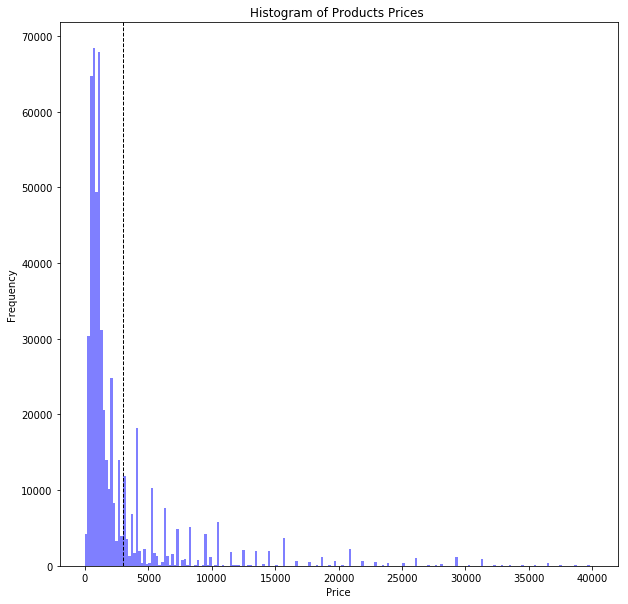

In [72]:
plt.figure(figsize=(10,10))
num_bins = 200
plt.hist(for_clusters['Price'], num_bins, facecolor='blue', alpha=0.5,range=(0,40000))
plt.title('Histogram of Products Prices ')
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.axvline(for_clusters.Price.mean(), color='k', linestyle='dashed', linewidth=1)
plt.show()

Histogram of Quantity

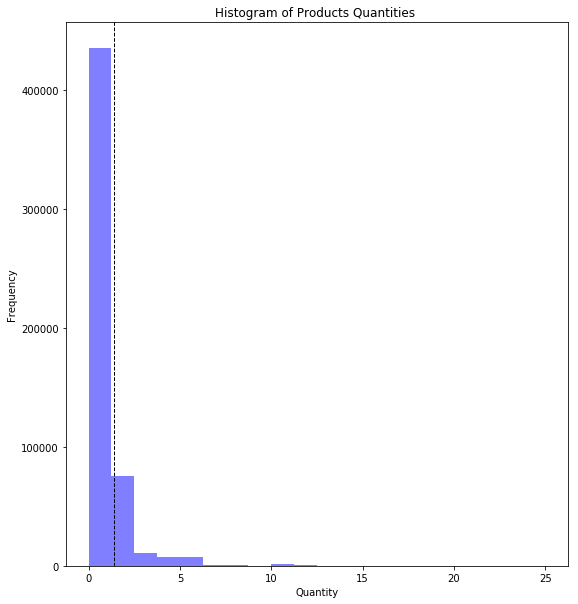

In [73]:
plt.figure(figsize=(9,10))
num_bins = 20
plt.title('Histogram of Products Quantities ')
plt.hist(for_clusters['Quantity'], num_bins, facecolor='blue', alpha=0.5,range=(0,25))
plt.ylabel('Frequency')
plt.xlabel('Quantity')
plt.axvline(for_clusters.Quantity.mean(), color='k', linestyle='dashed', linewidth=1)

plt.show()

Higly left skewed distribution. A right-skewed distribution will have the mean to the right of the median.A lot of concentration in lower values both in quantities and prices.

Scatter plot of Clicks vs Products bought.

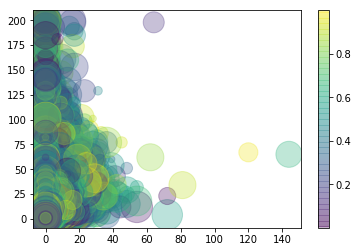

In [74]:
rng = np.random.RandomState(0)

colors = rng.rand(9249729)
sizes = 1000 * rng.rand(100)


plt.scatter(for_cl.Buys,for_cl.Clicks, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();